In [1]:
from graphviz import Digraph
from math import isnan

In [2]:
import pandas

In [3]:
def get_info(url):
    原始資料 = pandas.read_html(url, encoding="utf8")[1]
    學程 = 原始資料[原始資料[2].notnull()]
    學程=學程.set_index(學程[0]).drop(0, 1)
    學程.columns = 學程.iloc[0]
    學程 = 學程[1:]
    學程['學分']=學程['學分'].astype(float)
    return 學程

In [4]:
# 104 學年度應數基礎學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000003,B,AM___1042971'
基礎 = get_info(url)
# 印出結果，其他學程省略
基礎

科目名稱,英文科目名稱,科目代碼,學分,年級,學期,修別,*先修科目或#背景科目,備註
0,,,,,,,,
微積分(一),Calculus (I),AM__10000,4,一,上,必,NaN,NaN
微積分(二),Calculus(II),AM__10200,4,一,下,必,#微積分(一),NaN
線性代數(一),Linear Algebra (I),AM__10600,3,一,下,必,NaN,NaN
線性代數(二),Linear Algebra (II),AM__10900,3,二,上,必,#線性代數(一),NaN
數學導論,Introduction to mathematics,AM__11000,3,一,上,必,NaN,NaN
程式設計(一),Introduction to Computer Programming (I),CSIE10400,3,一,下,選,NaN,NaN
軟體實作與計算實驗,Software Implementations and Computation Exper...,AM__11300,3,一,下,選,NaN,NaN
計算機概論,Introduction to Computer Science,CSIE10200,3,一,上,選,NaN,NaN


In [5]:
# 104 學年度數學科學組核心(一)學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000007,B,AM___1042971'
數科組核心一  = get_info(url)

In [6]:
# 104 學年度數學科學組核心(二)學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000008,B,AM___1042971'
數科組核心二  = get_info(url)

In [7]:
# 104 學年度統計資料分析學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000010,B,AM___1042971'
統計資料分析  = get_info(url)


In [8]:
# 104 學年度數學學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000014,B,AM___1042971'
數學  = get_info(url)

In [9]:
# 104 學年度資訊計算學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000013,B,AM___1042971'
資訊計算  = get_info(url)

In [10]:
# 104 學年度數學科學學程
url = 'http://sys.ndhu.edu.tw/aa/class/RuleSearch/RuleDetail.aspx?id=104,1040000119,B,AM___1042971'
數學科學  = get_info(url)

In [11]:
數科組學程名稱 = ['基礎', '數學', '數學科學', '數科組核心一', '數科組核心二', '統計資料分析', '資訊計算']
數科組學程 ={x:globals()[x] for x in 數科組學程名稱}

In [12]:
for k in 基礎.iloc[1].keys():
    print(k+":", 基礎.iloc[1][k])

英文科目名稱: Calculus(II)
科目代碼: AM__10200
學分: 4.0
年級: 一
學期: 下
修別: 必
*先修科目或#背景科目: #微積分(一)
備註: nan


In [13]:
course_data = {}
for k,x in 數科組學程.items():
    for i in x.index:
        if i not in course_data:
            #print(i, x.loc[i])
            course_data[i]=dict(x.loc[i])
            course_data[i]['學程'] = [k]
            if not isinstance(course_data[i]['*先修科目或#背景科目'], str):
                course_data[i]['*先修科目或#背景科目'] = ([], [], [], set())
            else:
                s = course_data[i]['*先修科目或#背景科目'].split('/')
                先修 = [y[1:] for y in s if y[0]=='*']
                背景 = [y[1:] for y in s if y[0]=='#'] 
                其它 = []
                多餘 = set()
                course_data[i]['*先修科目或#背景科目'] =(先修, 背景, 其它, 多餘)
        else:
            course_data[i]['學程'].append(k)
            if x.loc[i]['修別'] == '必':
                course_data[i]['修別'] = '必'

In [14]:
新增列表 = [
       ("計算機概論", "程式設計(一)"),
        ("程式設計(一)", "程式設計(二)"),
        ("程式設計(二)", "演算法"),
        ("程式設計(一)", "資料結構"),
       ("高等線性代數", "代數(一)"), 
       ("分析導論", "集合論"), ("高等微積分(二)", "傅氏分析"),("高等線性代數", "傅氏分析"),
        ("數學導論", "離散數學"),
       ("高等微積分(一)", "拓樸學"),
       ("數學導論", "數論"),
       ("高等線性代數", "動態系統"), ("高等微積分(二)", "動態系統"),
      ("高等線性代數", "偏微分方程"), ("高等微積分(二)", "偏微分方程"),
    ("高等微積分(二)", "對局論"),
      ("高等線性代數","微分方程"),
    ("數學導論", "軟體實作與計算實驗"),
    ("軟體實作與計算實驗", "統計軟體與實務應用"), ("程式設計(二)", "統計軟體與實務應用"),
    ("程式設計(二)", "作業系統"),("數值方法", "微陣列基因資料分析"), 
    ("高等微積分(二)", "數理統計學(一)"), ("微積分(二)", "數值方法")
       
       ]
for x,y in 新增列表:
    l = course_data[y]['*先修科目或#背景科目'][2]
    s = set(l)
    s.add(x)
    l[:] = list(s)

In [15]:
# 去除多餘
for i in range(10):
    for k,v in course_data.items():
        for g0 in v['*先修科目或#背景科目'][0]+v['*先修科目或#背景科目'][1]+v['*先修科目或#背景科目'][2]:
                for g2 in course_data[g0]['*先修科目或#背景科目']:
                    for g3 in g2:
                        v['*先修科目或#背景科目'][-1].add(g3)

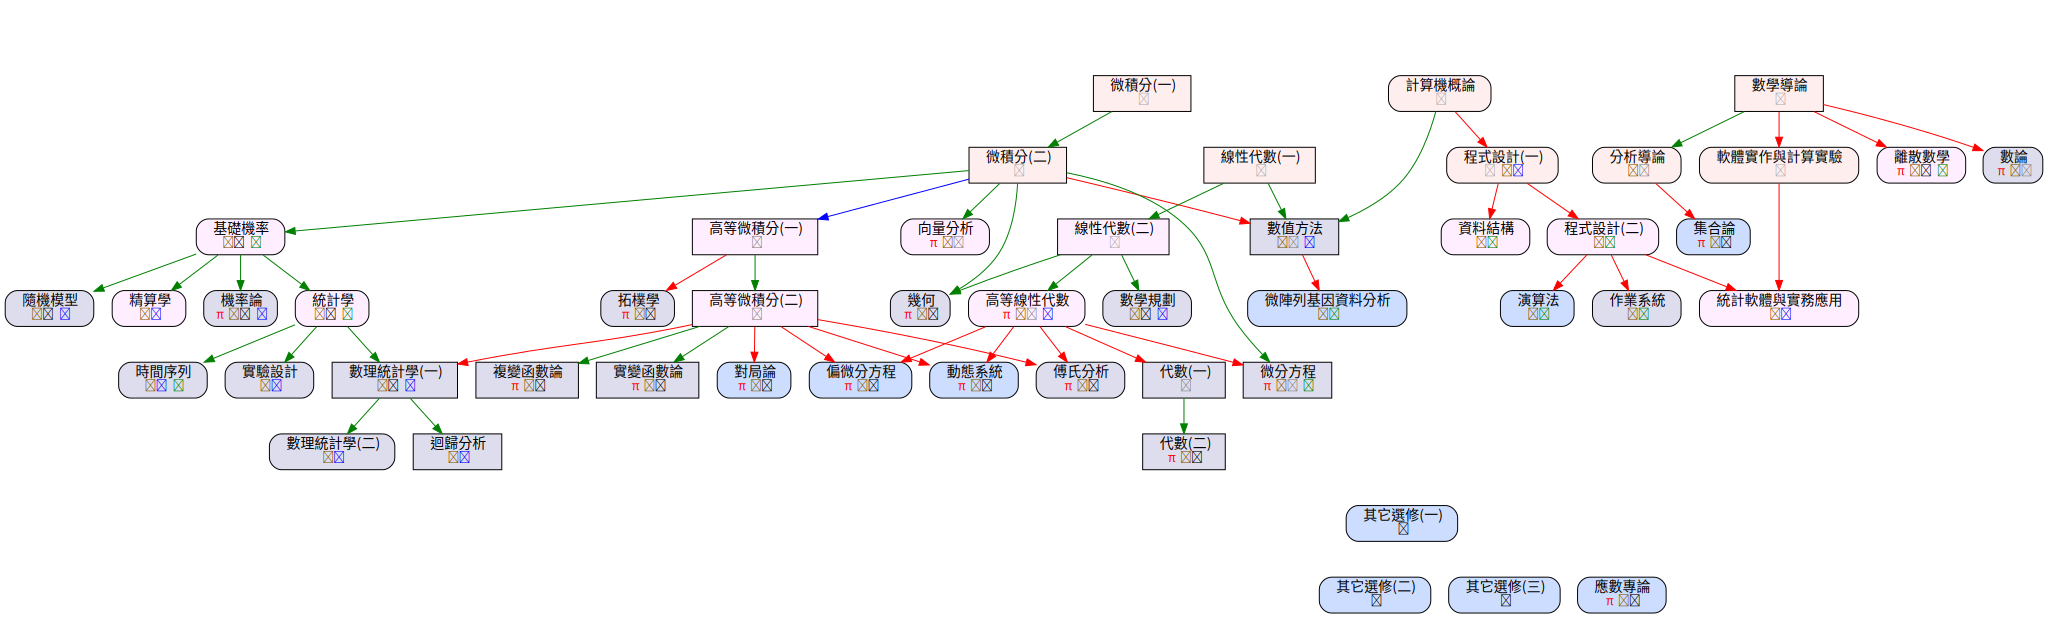

In [16]:
dot = Digraph(comment="課程地圖",  node_attr={"fontname":"Noto Sans CJK TC"})

數科組學程顏色 = {'基礎':"#aaaaaa", 
                 '數學': "red", 
                 '數學科學': "#7f5500", 
                 '數科組核心一': "grey", 
                 '數科組核心二': "black", 
                  '統計資料分析': "blue", 
                  '資訊計算': "green"}
數科組學程符號 = {'基礎':"🏗", 
                 '數學': "π", 
                 '數學科學': "🔬", 
                 '數科組核心一': "💙", 
                 '數科組核心二': "💕", 
                  '統計資料分析': "📊", 
                  '資訊計算': "💻"}

年級 = "一二三四"
level = [i+t for i in 年級 for t in "上下"]
for k,v in course_data.items():
    shape = "box"
    style = "filled"
    if v['修別'] == '選':
        style += ", rounded"
    color = {'一': "#ffeeee", "二": "#ffeeff", "三": "#ddddee", "四": "#ccddff"}[v['年級']]
    l = '''<
    %s <BR /> %s>'''%(k, 
            " ".join("<FONT POINT-SIZE='12' color='%s'>%s</FONT>"%(數科組學程顏色[z],數科組學程符號[z]) for z in sorted(v['學程'])))
    dot.node(k,  l, fillcolor = color, style=style, shape=shape)

for n in level:
    dot.node(n,n, style="invis")
for i in range(len(level)-1):
    dot.edge(level[i], level[i+1], style="invis")
for k,v in course_data.items():
    if not v['*先修科目或#背景科目'][0]+v['*先修科目或#背景科目'][1]+v['*先修科目或#背景科目'][2]:
        dot.edge(v['年級']+v['學期'], k , style="invis")
    for g in v['*先修科目或#背景科目'][0]:
        if g not in v['*先修科目或#背景科目'][-1]:
            dot.edge(g, k, color="blue")
    for g in v['*先修科目或#背景科目'][1]:
        if g not in v['*先修科目或#背景科目'][-1]:
            dot.edge(g, k, color="#007f00")
    for g in v['*先修科目或#背景科目'][2]:
        if g not in v['*先修科目或#背景科目'][-1]:
            dot.edge(g, k, color="red")
dot

In [17]:
dot.render('數科組課程地圖', view=True)

'數科組課程地圖.pdf'